# **<span style='color:#F76241'>|</span>Systems Development for Marketing </b>**
### Building a Recommended System for YELP Dataset - David Andrew - 500903075
## <font > **Structure:** </font>
1. [Introduction](#1-Introduction)<br>
    1.1 [Main Research question](#1.1Research-question)<br>
    1.2 [Sub Research question](#1.1Research-question)<br>
    1.3 [Data Preparation and Preprocessing](#1.2-Dataset)<br>
2. [Exploratory Data Analysis(EDA)](#2-Yelp-Dataset)<br>
    2.1 [Distribution of Ratings on Whole Dataset](#1.1-Data-Preparation-and-Preprocessing)<br>
    2.2 [Distribution of Review Counts on Whole Dataset](#2.2-Filtering-the-Dataset-for-Popular-Movies-and-Active-Users)<br>
    2.3 [Top 10 Cities with the Highest Number of Businesses on Yelp](2.3-Data-Visualizations)<br>
    2.4 [Top 10 States with the Highest Number of Businesses on Yelp](2.4-Train/Validation/Testset-Splitting)<br>
    2.5 [Star Ratings vs. Review Counts](2.5-Train/Validation/Testset-Splitting)<br>
    2.6 [Correlation analysis between Star Ratings vs. Review Counts](2.6-Train/Validation/Testset-Splitting)<br>
3. [Data Filtering for Popular Businesses and Ratings](#3-Sub-Question)<br>
    3.1 [CREATING NEVADA SAMPLE](#3.1-)<br>
    3.2 [CREATING ARIZONA SAMPLE](3.1.1-Jokes-similarity)<br>
4. [Data Preparation for KNN Recommender System](#4-Sub-Question)<br>
    4.1 [Nevada Data Preparation](#4.1-)<br>
    4.2 [Arizona Data Preparation](4.1.1-Jokes-similarity)<br>
5. [KNN Model Building & Recommender](#5-Conclusion)<br>
    5.1 [NEVADA RECOMMENDER USING KNN](#5.1-)<br>
        5.1.1 [KNN Hyperparameter Tuning](#5.2-)<br>
    5.3 [ARIZONA RECOMMENDER USING KNN](#5.3-)<br>
6. [SVD Model Building](#6-)<br>
    6.1 [NEVADA RECOMMENDER USING SVD MODEL](#6.1-)<br>
    6.2 [ARIZONA RECOMMENDER USING SVD MODEL](#6.2-)<br>
7. [Conclusion & Results](#3-Conclusion)<br> 

![Alt text](About%20Yelp%20dataset.png)

## <b>1<span style='color:#F76241'>|</span> Introduction </b>
Recommender systems have become an essential tool in various domains, enabling businesses to personalize user experiences and improve customer satisfaction. Collaborative filtering techniques analyze patterns of user behavior and item preferences to generate personalized recommendations.

The KNN algorithm leverages the similarity between users or items to make predictions and suggest items of interest. By finding the nearest neighbors based on user-item ratings, KNN can identify similar users or items and provide accurate recommendations.

On the other hand, SVD is a matrix factorization technique that uncovers latent factors underlying user-item interactions. By decomposing the user-item rating matrix into lower-dimensional representations, SVD captures the latent preferences and characteristics of users and items, allowing for more efficient and accurate recommendations.

This assignment will explore the implementation of both KNN and SVD models on the popular Yelp dataset. The models will be trained using a filtered dataset containing user-item ratings, evaluate their performance using appropriate metrics, and fine-tune their parameters for optimal results. The following Business question and sub-questions has been formulated:

**<span style='color:#F76241'>1.1 Main Research question:</span>** </br>
How can we utilize collaborative filtering methods to develop business recommendations for Yelp users in the top US states?

**<span style='color:#F76241'>1.2 Sub Research questions:</span>** </br>
   
1. Is there a relationship between the Number reviews and the ratings given to a business. If Yes? then to what extent does the Star ratings impact the reviews given to a business?
   
2. What are the top 10 states with the highest number of businesses on Yelp?
   
3. How effective is the KNN model on the business recommendations in the top 2 states with the highest number of businesses on Yelp?
   
4. How effective is the SVD model on the business recommendations in the top 2 states with the highest number of businesses on Yelp?

5. How does the choice of collaborative filtering method (KNN or SVD) impact the recommendation quality for businesses in the top 2 states?
</br>

</div>

### <b>1.3<span style='color:#F76241'>|</span> Data Importation</b>

In this section, the necessary libraries and the datasetwill be imported. Data cleaning and preprocessing tasks will also be performing. Sklearn library was used for KNN and Surprise was used for the SVD<br>

The following Python libraries have been imported for data analysis, data visualization and recommender system tasks:

1.  The os library provides a way of interacting with the operating system. 
2.  The pandas library is used for data manipulation and analysis. 
3.  The numpy library is used for numerical calculations. 
4.  The seaborn and matplotlib.pyplot libraries are used for data visualization. 
5.  The scipy.sparse and scipy.sparse.csr_matrix libraries are used for sparse matrix manipulation. 
6.  The sklearn.neighbors library is used for nearest neighbors algorithm. 
7.  The sklearn.model_selection library is used for data splitting and cross-validation. 
8.  The sklearn.metrics library is used for performance evaluation. The surprise library is used for recommendation systems.
9.  The specific functions imported from the surprise library are accuracy, SVD, and KNNBasic. 
10. The surprise.model_selection is used for train_test_split and cross_validate functions.

In [1]:
#importing libraries
import json #library for working with JSON files
import os #library for 
import gc #garbage collector library for saving RAM
import pandas as pd #pandas dataframe library
import numpy as np #numpy array library
import matplotlib.pyplot as plt #library for plotting 
import seaborn as sns #seaborn library for visualization
import branca.colormap as cm    #library for color mapping
import plotly.express as px #plotly library for visualization

import statsmodels.api as sm 
from statsmodels.formula.api import ols #
import scipy.stats as stats #library for statistical analysis

#libraries to execute KNN
import sklearn as sk 
from scipy import sparse
from sklearn.neighbors import KNeighborsClassifier #KNN function for checking the nearest neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV #library for perfroming cross validation and Hyparparameter tuning
from sklearn.metrics import make_scorer, mean_squared_error as mse
from sklearn.model_selection import train_test_split #library for spliting dataset into train and test
from sklearn.neighbors import NearestNeighbors #KNN function for checking the nearest neighbors
from sklearn.model_selection import GridSearchCV #Gridsearch function for hyperparameter tuning
from scipy.sparse import csr_matrix #Function to convert dataframe to a sparse matrix
from sklearn.metrics.pairwise import cosine_similarity #function to measure the distance between vectors
from sklearn.metrics import mean_absolute_error #function for checking model accuracy

The following steps are taken in the data Importation phase:
- The business and reveiw datasets are imported from the Yelp dataset.
- Dropped null values and duplicates from both datasets.
- The final Yelp dataset is created by merging the business and review datasets.

The Yelp dataframe is further filtered and prepared for the recommender system tasks in the subsequent sections which comes after the EDA<br>
in this notebook.

In [2]:
# Load the Yelp Dataset

# Load JSON data
def load_json_data(file_path): #function to load JSON data
    data = [] #create empty list
    with open(file_path, 'r', encoding='utf-8') as file: # open file
        for line in file: #loop through each line
            data.append(json.loads(line)) #append each line to the list
    return data #return the list

# Load Yelp dataset
businesses = load_json_data('C:/Users/User/Dropbox/PC/Desktop/Masters DDB/System development for marketing/Yelp/yelp-dataset/yelp_business.json')
reviews = load_json_data('C:/Users/User/Dropbox/PC/Desktop/Masters DDB/System development for marketing/Yelp/yelp-dataset/yelp_review.json')

# Create DataFrames
business_df = pd.DataFrame(businesses)
review_df = pd.DataFrame(reviews)

In [3]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [4]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [5]:
# droping the null values and duplicates
business_df = business_df.dropna()
business_df.drop_duplicates(subset=['business_id'], keep='first', inplace=True)

reviews_df = review_df.sort_values(by=['user_id'])
reviews_df.drop_duplicates(subset=['user_id', 'business_id'], keep='first', inplace=True)

In the next step, we will be merging the review dataset with the business dataset to get the business name and the business categories for each review. We will be using the business_id column to merge the two datasets.

In [6]:
#checking th number of rows and columns on the business dataframe
business_df.shape

(146796, 14)

In [7]:
#checking the number of rows and columns on the review dataframe
review_df.shape

(8021122, 9)

In [8]:
#printing the unique users, states, cities and businesses in the datasets
print("Unique users: ", review_df.user_id.nunique())
print("Unique states: ", business_df.state.nunique())
print("Unique businesses: ", review_df.business_id.nunique())
print("Unique cities: ", business_df.city.nunique())

Unique users:  1968703
Unique states:  31
Unique businesses:  209393
Unique cities:  1042


In [9]:
#merging the two dataframes
yelp_df = pd.merge(business_df, review_df, on='business_id', how='inner')

In [10]:
#checking the number of rows and columns on the merged dataframe
yelp_df.shape

(7299005, 22)

In [11]:
#Displaying the first 5 rows of the merged dataframe
yelp_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,...,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",YkpjR5N5TLkwHi20IZ15zg,xDtS2iKsJuVUVzB2YhfPsg,4.0,23,2,4,Driving more than an half-hour to get to a gun...,2012-06-26 00:48:30
1,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,...,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",rB1D3_F5cED234lqvnJK1A,46HhzhpBfTdTSB5ceTx_Og,4.0,15,0,3,"My dad came down to the area to visit, and whi...",2012-05-29 23:44:04
2,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,...,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",S5UuPziiDiEqFPuX5bY-kg,vBxT4_bjFrbZEarWz6vsCQ,4.0,0,0,0,First time and and last time. I'm a punk!!! 2...,2017-06-18 00:24:54
3,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,...,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",nwEXkyNGhtsRCAv7kS9Urg,qiz4Ri_cMSsoH3ccN19eAw,5.0,2,0,0,"Besides being a great range, they are not chea...",2016-02-14 02:28:57
4,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,...,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",oT2weUEWpPOqIAer3MmrCg,0awwOxKGZVDt52vxkEX-eA,1.0,2,1,0,"Place is nice to look at, but wouldn't really ...",2014-05-28 20:00:46


In [12]:
# Basic statistics
print(yelp_df.describe())

           latitude     longitude       stars_x  review_count       is_open  \
count  7.299005e+06  7.299005e+06  7.299005e+06  7.299005e+06  7.299005e+06   
mean   3.706951e+01 -1.031973e+02  3.750874e+00  4.841533e+02  8.700068e-01   
std    3.966718e+00  1.561803e+01  7.120253e-01  9.477084e+02  3.362960e-01   
min    2.149726e+01 -1.580255e+02  1.000000e+00  3.000000e+00  0.000000e+00   
25%    3.361038e+01 -1.151581e+02  3.500000e+00  5.600000e+01  1.000000e+00   
50%    3.610238e+01 -1.119940e+02  4.000000e+00  1.680000e+02  1.000000e+00   
75%    4.039794e+01 -8.145559e+01  4.000000e+00  4.720000e+02  1.000000e+00   
max    5.129698e+01 -7.280655e+01  5.000000e+00  1.012900e+04  1.000000e+00   

            stars_y        useful         funny          cool  
count  7.299005e+06  7.299005e+06  7.299005e+06  7.299005e+06  
mean   3.746676e+00  1.282186e+00  4.511242e-01  5.730929e-01  
std    1.465963e+00  3.482987e+00  2.199143e+00  2.490178e+00  
min    1.000000e+00 -1.000000e+0

In [13]:
# Check for missing values
print(yelp_df.isnull().sum())


business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars_x         0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
review_id       0
user_id         0
stars_y         0
useful          0
funny           0
cool            0
text            0
date            0
dtype: int64


<b><span style='color:#F76241'>|</span> REASON FOR DROPING COLUMNS</b>
 - Address: This column is not needed for the analysis.
 - attributes: This column is not needed for the analysis.
 - hours: This column is not needed for the analysis.
 - is_open: This column is not needed for the analysis.
 - stars_x: This column is is from the business dataset and is not needed for the analysis. We will use the stars column from the review dataset.
 - useful: This column is not needed for the recommender analysis.
 - funny: This column is not needed for the recommender analysis.
 - cool: This column is not needed for the recommender analysis.

In [14]:
#Drop columns that are not needed for the EDA
yelp_df.drop(['address', 'attributes', 'hours', 'is_open', 'stars_x', 'useful', 'funny', 'cool'], axis=1, inplace=True)


## <b>2 <span style='color:#F76241'>|</span> Exploratory Data Analysis </b>

In this EDA the yelp data is explored to understand it better and to get some insights that will guide the flow of our analysis and model. We have used the following progession to explore the data:

1.  Distribution of the ratings in the whole dataset
2.  Distribution of the reviews in the whole dataset
3.  Top 10 Cities with the Highest Number of Businesses on Yelp
4.  Top 10 States with the Highest Number of Businesses on Yelp
5.  Distribution of ratings against review counts
6.  Correlation analysis between ratings and review counts

The aim of the following EDA is to help inform the recommender system design and to help answer the research questions. Description of each EDA is provided before the code and the output.


**2.1 <span style='color:#F76241'>|</span> Distribution of Ratings on Whole Dataset**

The ratings are skewed towards the left. The ratings 1, 2 and 3 are very less compared to 4 and 5. This shows that the users are more likely to give a higher rating to a business. While this is partly true based on the result on the histogram below, we cannot conclude that the users are biased towards giving a higher rating to a business. This is because the dataset is not balanced. The 1-Star ratings are the third highest ratings in the dataset. This shows that the users are not biased towards giving a higher rating to a business with higher ratings.

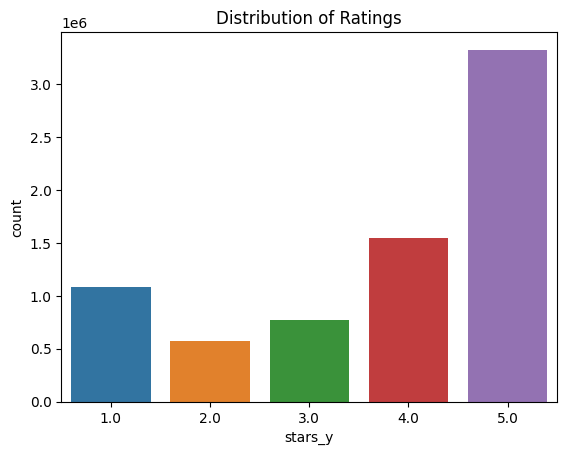

In [15]:
# Distribution of ratings on Whole Dataset
sns.countplot(x='stars_y', data=yelp_df)
plt.title('Distribution of Ratings')
plt.show()

**2.2 <span style='color:#F76241'>|</span> Distribution of Review Counts on Whole Dataset**

The distribution of the review counts shows that most of the businesses have a review count within the range of 200 (we know this because we have 10 bins per 2000 review count in the  histogram which means one point is 200 reviews). There are fewer businesses that have more than 200 reviews. The distribution of the review counts is skewed to the right. This will be important to keep in mind when we are building the recommender system. (See the filtering section for more details)

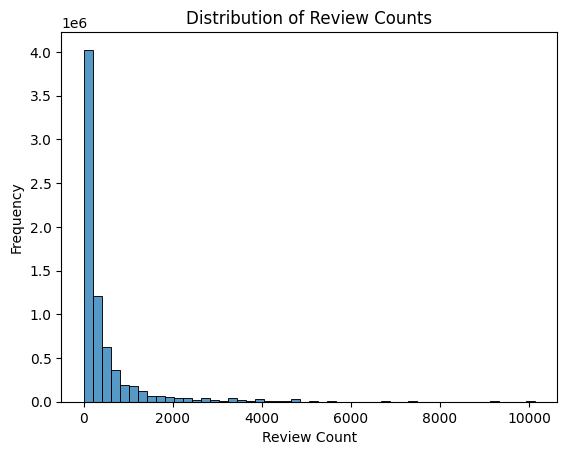

In [16]:
# Distribution of review counts
sns.histplot(yelp_df['review_count'], kde=False, bins=50)
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()

**2.3 <span style='color:#F76241'>|</span> Top 10 Cities with the Highest Number of Businesses on Yelp** <br>

The Code below displays the top 10 cities with the highest number of businesses in the Yelp dataset. The aim of this code is to get a better understanding of the dataset and to see which cities have the most businesses on Yelp. This bar plot shows the top 10 cities with the most businesses listed on Yelp. On the x-axis, we have the names of the cities, and on the y-axis, the number of businesses. This visualization helps us understand which cities have the highest concentration of Yelp-listed businesses. Las Vegas has the highest number of businesses listed on Yelp, followed by Toronto, Phoenix, and Charlotte.

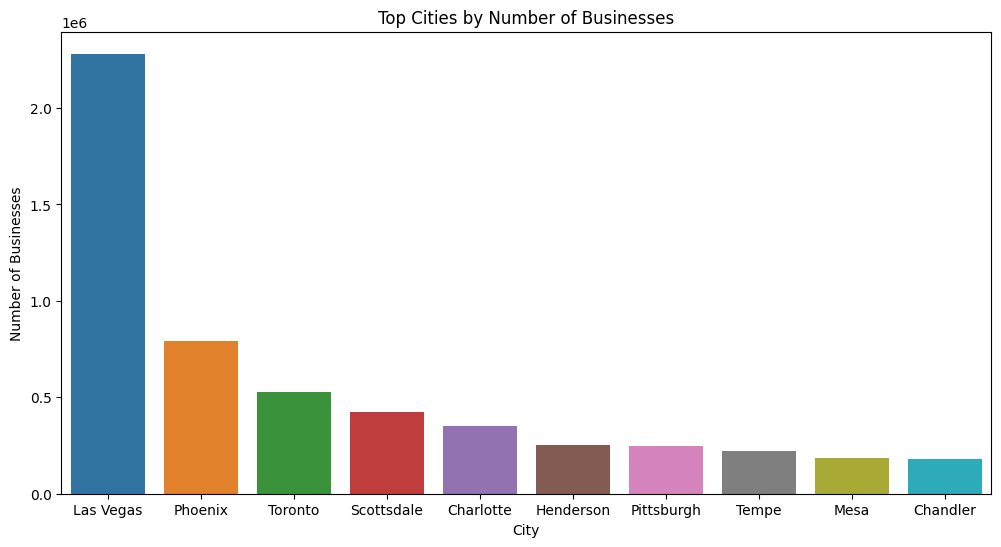

In [17]:
# Top cities by number of businesses
top_cities = yelp_df['city'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top Cities by Number of Businesses')
plt.xlabel('City')
plt.ylabel('Number of Businesses')
plt.show()


**2.4 <span style='color:#F76241'>|</span> Top 10 States with the Highest Number of Businesses on Yelp** <br>

In the code below, we have created a bar plot to show the top 10 states with the highest number of businesses in the Yelp dataset. This visualization helps us understand which states have the highest concentration of Yelp-listed businesses and can provide insights into the geographical distribution of the businesses and help identify areas with high business activity. We are particularly interested in the top 10 states with the highest number of businesses. Nevada has the highest number of businesses listed on Yelp, followed by Ontario, Arizona, and North Carolina. We do this in two steps:

1. First, we obtain the count of businesses per state from the Yelp dataset.
2. Second, we plot the top 10 states with the highest number of businesses in the Yelp dataset.

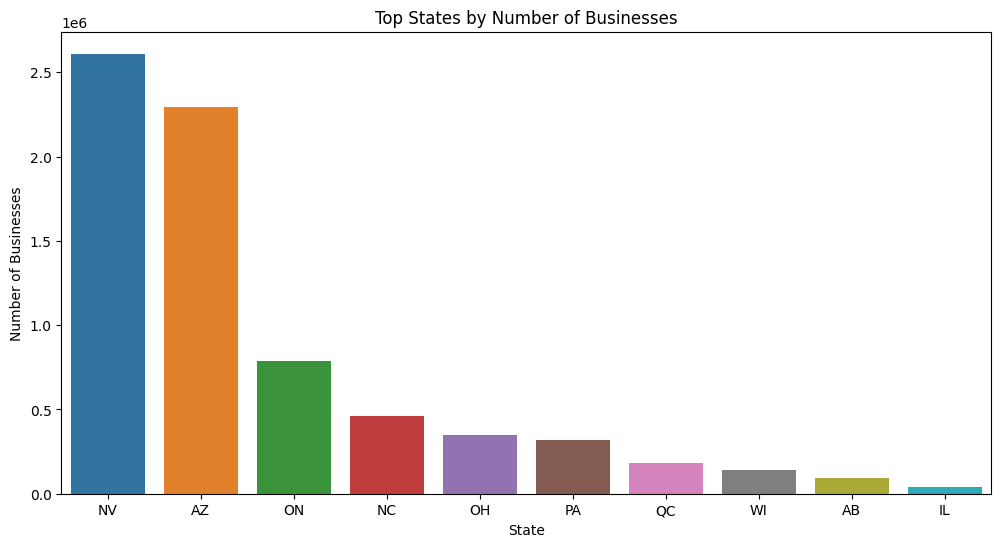

In [18]:
# Top states by number of businesses
top_states = yelp_df['state'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x = top_states.index, y = top_states.values)
plt.title('Top States by Number of Businesses')
plt.xlabel('State')
plt.ylabel('Number of Businesses')
plt.show()


**2.5 <span style='color:#F76241'>|</span>Star Ratings vs. Review Counts** <br>

The following code aims to visualize the relationship between the star ratings of businesses (stars_y) and their corresponding review counts (review_count) in the Yelp dataset. This helps us understand the distribution of review counts for each star rating category.

The boxplot visualization is created using Seaborn's boxplot() function, which provides a way to represent the distribution of data values across different categories. In this case, each category corresponds to a different star rating.

This visualization can provide insights into how the quantity of reviews received by businesses might be related to their star ratings.<br>

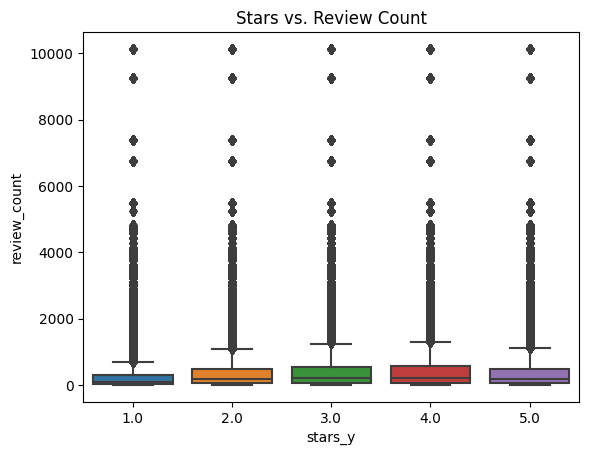

In [19]:
# Correlation between stars and review count
sns.boxplot(x='stars_y', y='review_count', data=yelp_df)
# Set the title of the plot
plt.title('Ratings vs. Review Count')
# Display the plot
plt.show()

**<span style='color:#F76241'> Sub-question 1: Is there a relationship between the number of reviews and the ratings given to a business. If Yes? then to what extent does the Star ratings impact the reviews?</span>**

We can see that businesses with a 5-star rating have a higher median review count than businesses with a 1-star rating. This suggests that businesses with a higher star rating tend to receive more reviews than businesses with a lower star rating. While the review count do not really differ much across the star ratings, other interesting observations include:
- Businesses with a 4-star rating have a higher median review count than businesses with a 3-star rating.
- Businesses with a 2-star rating have a higher median review count than businesses with a 1-star rating.

To answer the question, based on the plot, it is a little evident that there is a relationship between the reviews and the ratings and the significance of this relationship can be tested with a simple pearson correlation. This statistical test will be performed in the next section.

**2.6 <span style='color:#F76241'>|</span> Correlation analysis between Star Ratings vs. Review Counts** <br>
Pearson correlation coefficient is a measure of the linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. 

We use this to check the correlation between the review count and the star ratings. The correlation coefficient is 0.03 which is very low. This shows that there is no linear correlation between the review count and the star ratings. This means that the star ratings do not have a significant impact on the review count. This is also evident from the boxplot above. The boxplot shows that the review count does not differ much across the star ratings. This means that the star ratings do not have a significant impact on the review count.

C:\Users\User\AppData\Local\Temp\ipykernel_26772\2947514156.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = yelp_df.corr()


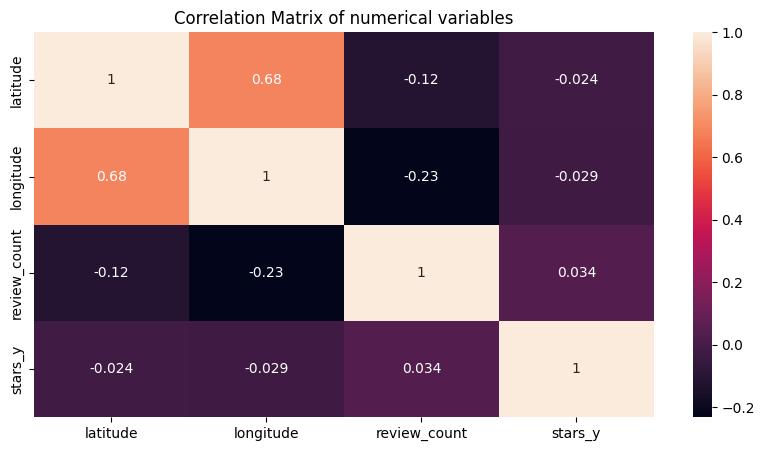

In [20]:
# Correlation matrix of the independent Variables
corr_matrix = yelp_df.corr()
fig, ax=plt.subplots(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, ax=ax) #creating a heatmap
plt.title("Correlation Matrix of numerical variables")
plt.show()

## <b>3 <span style='color:#F76241'>|</span>Data Filtering for Popular Businesses and Ratings</b><br>

In this Section we will be filtering the dataset for popular businesses and ratings. We will be using the following criteria to filter the dataset:
- Active users: Users who have rated at least 4 businesses
- Review Count: Number of reviews of the business is greater than or equal to 200
- Sample of 500 businesses in the top 2 states with the highest number of businesses (Nevada and Arizona)

The essense of this is for further memory optimization reasons and subsequently help to improve the performance and relevance of our recommendation systems.

In the code below, we initiate the filtering process. The filtering process is done in these stages:

- First, we filter the dataset for active users who have rated more businesses based on the average number of ratings per user calculated below.
- Second, we filter the dataset for businesses with a review count greater than or equal to 200 (Based on the histogram in the EDA section - Distribution of Review Counts on Whole Dataset). This will help us focus on the businesses that have a higher review count
- From this filtered set, we will select sample of 500 business by the top 2 states to help us answer our research questions. The sample is selected based on the top 2 states with the highest number of businesses. 
- Next, we create subsets of the filtered dataset for the top 2 states with the highest number of businesses (Nevada and Arizona). This will help us answer our research questions.

In [21]:
# Count the number of ratings for each user
ratings_count = yelp_df.groupby('user_id')['stars_y'].count()

# Compute the average number of ratings per user
average_number_of_ratings_per_user = ratings_count.mean()

# Filter out users that have less than 3 ratings
active_users = ratings_count[ratings_count >= average_number_of_ratings_per_user]

In [22]:
#print the average_number_of_ratings_per_user
print(f"The average number of ratings per user is {average_number_of_ratings_per_user}")

The average number of ratings per user is 3.94455309957139


In [23]:
# Now, 'active_users' is a Series where the index is 'user_id' and the value is the number of ratings
# If you want to get a DataFrame with the information of the active users, you can do:
yelp_df = yelp_df[yelp_df['user_id'].isin(active_users.index)]

After this first step of filtering, the updated dataset has **1,980,621** data points from **8021122**. This is a significant reduction in the size of the dataset. This is a reduction of 75.3% in the size of the dataset. This will help us focus on business that are rated more and also on users who have rated more businesses.

In [24]:
yelp_df.shape

(5246057, 14)

In [25]:
#Reducing the dataframe to businesses with an average review count above 200
yelp_df = yelp_df[yelp_df['review_count'] >= 200]

In [26]:
#rechecking the shape of the dataframe
yelp_df.shape

(2384679, 14)

<b>3.1 <span style='color:#F76241'>|</span>CREATING NEVADA SAMPLE.</b>

In [27]:
#get a random sample of 500 unique business_ids in Nevada
nv_business_ids = yelp_df[yelp_df['state'] == 'NV']['business_id'].unique() #get all the business_ids in Nevada
nv_business_ids = np.random.choice(nv_business_ids, size=500, replace=False) #get a random sample of 500 business_ids

#Create a dataframe called 'nevada_df'
nevada_df = yelp_df[yelp_df['business_id'].isin(nv_business_ids)]

In [28]:
#rechecking the shape of the dataframe
nevada_df.shape

(216242, 14)

For Nevada, we now have sample of 131,324 data points from 1,980,621. This is a reduction of 93.4% in the size of the dataset.

<b>3.2 <span style='color:#F76241'>|</span>CREATING ARIZONA SAMPLE.</b>

In [29]:
#get a random sample of 500 unique business_ids in Arizona
az_business_ids = yelp_df[yelp_df['state'] == 'AZ']['business_id'].unique() #get all business_ids in Arizona
az_business_ids = np.random.choice(az_business_ids, size=500, replace=False) #get a random sample of 500 unique business_ids in Arizona

#Create a dataframe called 'arizona_df'
arizona_df = yelp_df[yelp_df['business_id'].isin(az_business_ids)]


In [30]:
#rechecking the shape of the dataframe
arizona_df.shape

(164565, 14)

## <b>4 <span style='color:#F76241'>|</span>Data Preparation for KNN Recommender System</b>

Based on the above filtering process, it is evident that the size of the dataset has been reduced from **8021122** to **1360149** data points overall. The code below demonstrates the preparation of the Nevada and Arizona datasets to a structure the dataset for the recommender system in the following section. The following steps are used:
- First, we create a new column called "user_id_index" and "business_id_index", then assign a unique integer value to each user_id in the dataset. we do this because the business and user ids are alphanumeric and we need to convert them to integer values for easy manipulation in the recommender system.
- Rename the stars_y column to "rating" to make it easier to understand.
- Third, we check for duplicate user_id and business_id pairs and handle them by keeping the first instance of the pair and dropping the rest to avoid problems when creating the user_business matrix. We do this instead of dropping all the duplicates because we do not want to lose the information about the rating given by the user to the business.
- Fourth, we create a new dataframe called "nevada_filtered" and "arizona_filtered" by selecting the columns "user_id_index", "name", "business_id_index", and "rating" from the 'nevada_df' and 'arizona_df' dataframes respectively.
- The "user_id_index", "business_id_index", and "name" columns are renamed to "user_id", "business_id", and "business_name" respectively.
- Both dataframes are split into training and test sets using the train_test_split() function from the sklearn.model_selection library.
- Pivot Tables are created for both the training and test sets using the pivot_table() function from the pandas library. The pivot tables are created to have the "user_id" as the index, "business_id" as the columns, and "rating" as the values.
- The pivot tables are converted to sparse matrices using the csr_matrix() function from the scipy.sparse library and now ready to be used in the recommender system.

<b>This process is repeated for both Nevada and Arizona subsets thus we have two subsections below.</b>


<b>4.1 <span style='color:#F76241'>|</span>NEVADA DATA PREPARATION.</b>

In [31]:
#create a new column called "user_id_index" and assign a unique integer value to each user_id in the dataset.
nevada_df['user_id_index'] = nevada_df.groupby('user_id').ngroup()

#create a new column called "business_id_index" and assign a unique integer value to each business_id in the dataset.
nevada_df['business_id_index'] = nevada_df.groupby('business_id').ngroup()

#rename the 'stars_y' column to 'rating'
nevada_df.rename(columns={'stars_y': 'rating'}, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26772\3074232093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nevada_df['user_id_index'] = nevada_df.groupby('user_id').ngroup()
C:\Users\User\AppData\Local\Temp\ipykernel_26772\3074232093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nevada_df['business_id_index'] = nevada_df.groupby('business_id').ngroup()
C:\Users\User\AppData\Local\Temp\ipykernel_26772\3074232093.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [32]:
#visualizing the first 5 rows of the new dataframe
nevada_df.head()

,business_id,name,city,state,postal_code,latitude,longitude,review_count,categories,review_id,user_id,rating,text,date,user_id_index,business_id_index
9500,pZnHE9LS8OBWenUrGOLgDA,Eden Nails & Spa,Las Vegas,NV,89169,36.11811,-115.154223,213,"Skin Care, Beauty & Spas, Day Spas, Waxing, Na...",kM7JE7lFSqNMRAkZV-pOhg,2CgLe_T0JLIhEGbg60ThEA,4.0,Eden Nails & Spa has the biggest selection of ...,2017-06-07 00:03:20,4795,411
9503,pZnHE9LS8OBWenUrGOLgDA,Eden Nails & Spa,Las Vegas,NV,89169,36.11811,-115.154223,213,"Skin Care, Beauty & Spas, Day Spas, Waxing, Na...",52OLamIFpgyn-tB7MuNz-A,Oe4b9SDjQjhOApNZ5lCCTA,5.0,My laid friend had a pedicure and manicure don...,2016-08-25 21:23:52,38318,411
9506,pZnHE9LS8OBWenUrGOLgDA,Eden Nails & Spa,Las Vegas,NV,89169,36.11811,-115.154223,213,"Skin Care, Beauty & Spas, Day Spas, Waxing, Na...",k92IjnQwzpuX0H_MA34lIQ,t39INFyDMBKyHy9lWeLqMg,2.0,Went in to get a mani pedi (gel on the nail an...,2018-04-16 05:00:32,85042,411
9509,pZnHE9LS8OBWenUrGOLgDA,Eden Nails & Spa,Las Vegas,NV,89169,36.11811,-115.154223,213,"Skin Care, Beauty & Spas, Day Spas, Waxing, Na...",saZTup1s3Z94CVgqdOBgEw,AiAOlN8oOvt4ZCGJ2ZRLDA,1.0,I can still feel the hard dead skin on the sur...,2018-06-09 20:12:40,17598,411
9510,pZnHE9LS8OBWenUrGOLgDA,Eden Nails & Spa,Las Vegas,NV,89169,36.11811,-115.154223,213,"Skin Care, Beauty & Spas, Day Spas, Waxing, Na...",GRVgWIIg8t41FNhpdJ49eg,QzgzSxoADRr7NSFP5jDjtw,5.0,We were in for the NFR and needed a manicures;...,2017-12-18 16:49:27,41779,411


<b><span style='color:#F76241'>|</span> Handling Nevada Duplicates </b>

In [33]:
# Count and print the number of duplicates in the DataFrame based on the "joke_id", "user_id_index"
duplicates = nevada_df.duplicated(subset=['user_id_index', 'business_id_index', 'rating'])
print(f"Number of duplicate rows = {duplicates.sum()}")

Number of duplicate rows = 5802


Because the number of duplicates is greater than 0, we handle the duplicates by keeping only the first occurrence instead of dropping all of them so we don't loose too much useful information.

In [34]:
# drop duplicates and keep the first occurence
nevada_df = nevada_df.drop_duplicates(subset=['user_id_index', 'business_id_index', 'rating'], keep='first')

In [35]:
duplicates = nevada_df.duplicated(subset=['user_id_index', 'business_id_index', 'rating'])
print(f"Number of duplicate rows = {duplicates.sum()}")

Number of duplicate rows = 0


In [36]:
#create a new dataframe with the columns 'user_id_index', 'business_id_index' and 'rating'
nevada_filtered = nevada_df[['user_id_index', 'name', 'business_id_index', 'rating']]
nevada_filtered.head()

,user_id_index,name,business_id_index,rating
9500,4795,Eden Nails & Spa,411,4.0
9503,38318,Eden Nails & Spa,411,5.0
9506,85042,Eden Nails & Spa,411,2.0
9509,17598,Eden Nails & Spa,411,1.0
9510,41779,Eden Nails & Spa,411,5.0


In [37]:
#rename the user_id_index and business_id_index columns to user_id and business_id
nevada_filtered.rename(columns={'user_id_index': 'user_id', 'business_id_index': 'business_id', 'name': 'business_name'}, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26772\1463637918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nevada_filtered.rename(columns={'user_id_index': 'user_id', 'business_id_index': 'business_id', 'name': 'business_name'}, inplace=True)


In [38]:
#checking the number of rows and columns in the new dataframe
nevada_filtered.shape

(210440, 4)

In [39]:
#visualizing the first 5 rows of the new dataframe
nevada_filtered.head()

,user_id,business_name,business_id,rating
9500,4795,Eden Nails & Spa,411,4.0
9503,38318,Eden Nails & Spa,411,5.0
9506,85042,Eden Nails & Spa,411,2.0
9509,17598,Eden Nails & Spa,411,1.0
9510,41779,Eden Nails & Spa,411,5.0


In [40]:
#checking the number of unique business_ids in the dataset
nevada_filtered['business_id'].nunique()

500

In [41]:
# Split the dataset into train and test sets
nevada_train_val, nevada_test = train_test_split(nevada_filtered, test_size=0.2, shuffle=False)
#spliting the train data into train and validation sets
nevada_train, nevada_val = train_test_split(nevada_train_val, test_size=0.2, shuffle=False)

In [42]:
#create a pivot table for the nevada dataset
nevada_pivot = nevada_filtered.pivot_table(index='user_id', columns='business_id', values='rating').fillna(0)

In [43]:
nevada_pivot.head()

business_id,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
user_id,,,,,,,,,,,,,,,,,,,,,
0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#split the pivot table into train and test sets
nevada_pivot_train_val, nevada_pivot_test = train_test_split(nevada_pivot, test_size=0.2, shuffle=False)
#spliting the train data into train and validation sets
nevada_pivot_train, nevada_pivot_val = train_test_split(nevada_pivot_train_val, test_size=0.2, shuffle=False)

In [45]:
# Visualise the sparsity of the train set
nevada_pivot_train.head()

business_id,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
user_id,,,,,,,,,,,,,,,,,,,,,
0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# Preprocess the data into a sparse matrix format
nevada_train_matrix = csr_matrix(nevada_pivot_train.values)
nevada_val_matrix = csr_matrix(nevada_pivot_val.values)
nevada_test_matrix = csr_matrix(nevada_pivot_test.values)

In [47]:
#check the shape of the train matrix
nevada_train_matrix.shape

(61021, 500)

<b>4.2 <span style='color:#F76241'>|</span>ARIZONA DATA PREPARATION.</b>

In [48]:
#create a new column called "user_id_index" and assign a unique integer value to each user_id in the dataset.
arizona_df['user_id_index'] = arizona_df.groupby('user_id').ngroup()

#create a new column called "business_id_index" and assign a unique integer value to each business_id in the dataset.
arizona_df['business_id_index'] = arizona_df.groupby('business_id').ngroup()

#rename the 'stars_y' column to 'rating'
arizona_df.rename(columns={'stars_y': 'rating'}, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26772\632161600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arizona_df['user_id_index'] = arizona_df.groupby('user_id').ngroup()
C:\Users\User\AppData\Local\Temp\ipykernel_26772\632161600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arizona_df['business_id_index'] = arizona_df.groupby('business_id').ngroup()
C:\Users\User\AppData\Local\Temp\ipykernel_26772\632161600.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

<b><span style='color:#F76241'>|</span> Handling Arizona Duplicates </b>

In [49]:
# Count and print the number of duplicates in the DataFrame based on the "business_id_index", "user_id_index"
duplicates = arizona_df.duplicated(subset=['user_id_index', 'business_id_index', 'rating'])
print(f"Number of duplicate rows = {duplicates.sum()}")

Number of duplicate rows = 4637


Because the number of duplicates is greater than 0, we handle the duplicates by keeping only the first occurrence instead of dropping all of them so we don't loose too much useful information.

In [50]:
# Drop duplicates and keep the first occurence
arizona_df = arizona_df.drop_duplicates(subset=['user_id_index', 'business_id_index', 'rating'], keep='first')

In [51]:
#create a new dataframe with the columns 'user_id_index', 'business_id_index' and 'rating'
arizona_filtered = arizona_df[['user_id_index', 'name', 'business_id_index', 'rating']]
arizona_filtered.head()

,user_id_index,name,business_id_index,rating
27090,58582,Oregano's Pizza Bistro,446,5.0
27091,24377,Oregano's Pizza Bistro,446,5.0
27092,4556,Oregano's Pizza Bistro,446,4.0
27094,56243,Oregano's Pizza Bistro,446,2.0
27096,45657,Oregano's Pizza Bistro,446,5.0


In [52]:
#rename the user_id_index and business_id_index columns to user_id and business_id
arizona_filtered.rename(columns={'user_id_index': 'user_id', 'business_id_index': 'business_id', 'name': 'business_name'}, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26772\148295134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arizona_filtered.rename(columns={'user_id_index': 'user_id', 'business_id_index': 'business_id', 'name': 'business_name'}, inplace=True)


In [53]:
# Split the dataset into train and test sets
arizona_train_val, arizona_test = train_test_split(arizona_filtered, test_size=0.2, shuffle=False)
#spliting the train data into train and validation sets
arizona_train, arizona_val = train_test_split(arizona_train_val, test_size=0.2, shuffle=False)
#Checking the shape of the train, validation and test sets
print('Train set has {} rows and {} columns'.format(arizona_train.shape[0], arizona_train.shape[1]))
print('Validation set has {} rows and {} columns'.format(arizona_val.shape[0], arizona_val.shape[1]))
print('Test set has {} rows and {} columns'.format(arizona_test.shape[0], arizona_test.shape[1]))


Train set has 102353 rows and 4 columns
Validation set has 25589 rows and 4 columns
Test set has 31986 rows and 4 columns


In [54]:
#create a pivot table for the Arizona dataset
arizona_pivot = arizona_filtered.pivot_table(index='user_id', columns='business_id', values='rating').fillna(0)

In [55]:
#split the pivot table into train and test sets
arizona_pivot_train_val, arizona_pivot_test = train_test_split(arizona_pivot, test_size=0.2, shuffle=False)
#spliting the train data into train and validation sets
arizona_pivot_train, arizona_pivot_val = train_test_split(arizona_pivot_train_val, test_size=0.2, shuffle=False)

In [56]:
# Visualize the the arizona train pivot table
arizona_pivot_train.head()

business_id,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Preprocess the data into a sparse matrix format
arizona_train_matrix = csr_matrix(arizona_pivot_train.values)
arizona_val_matrix = csr_matrix(arizona_pivot_val.values)
arizona_test_matrix = csr_matrix(arizona_pivot_test.values)

In [58]:
# Need to clear the RAM in order to run the next few code cells
del yelp_df
del business_df
del review_df
gc.collect() # garbage collector function to save some RAM

13286

## <b>5 <span style='color:#F76241'>|</span> KNN Model Building & Recommender</b>

KNN is a non-parametric, lazy learning algorithm. It is used for both classification and regression problems. It is a supervised learning algorithm which stores all the available data points and classifies a new data point based on the similarity. It is a distance-based algorithm that does not make any assumptions on the underlying data distribution. It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset. It is called a non-parametric algorithm because it does not make any assumption on the underlying data distribution. In this algorithm, the value of K is very crucial. K is the number of nearest neighbors to be considered. K can be any integer. A small value of K means that noise will have a higher influence on the result and a large value make it computationally expensive. The value of K should be such that most of the times it should be an odd number. The best value of K is selected by testing using different values of K. The most common distance metric used in KNN is Euclidean, Manhattan, and Minkowski. The Euclidean distance is the most used distance metric. The Minkowski distance is a generalization of the Euclidean and Manhattan distance.

The KNN model built in this assignment is based on the **user-user similarity**.

The Knn recommendation system takes user ID as an input and identifies 10 similar users using the KNN algorithm. It then recommends the business with the highest average rating among the 10 similar users.

The system is built on the Yelp dataset, which includes User IDs, Business IDs, and business ratings. By leveraging this data, we are able to provide users with recommendations that are tailored to the preferences of similar users. In the next section, we implement the following steps to build the KNN model:

- Performing hyperparameter tuning using the validation set by trying out different hyperparameter combinations and evaluate their performance on the validate matrix. This is performed using the GridSearchCV() function from the sklearn.model_selection library.
- I use the sparse train user-business matrix to train the best KNN model using the best hyperparameter values. This is embedded in the similar_users() function.
- Create a function called "get_user_similar_users()" to get the top 'k' similar users for a given user.
- using the similar_users() function, I create a function called "get_user_similar_businesses()" to get the top 'k' similar businesses for a given user.
- Using the similar_users() function, I create a function called "recommend_top_nevada_businesses_rmse()" to get the top 'k' business recommendations for a given user and evaluate the performance of the KNN model on the test set using RMSE as the performance metric.

More details on the implementation of the KNN model are provided in the following subsections. The same process is repeated for both the Nevada and Arizona datasets.

#### <b>5.1 <span style='color:#F76241'>|</span> NEVADA RECOMMENDER USING KNN </b><br>

 ***5.1.1<span style='color:#F76241'>|</span>KNN Hyperparameter Tuning*** <br>
 
 Hyperparameter tuning is the process of finding the best set of parameters for a machine learning model. It is an important step in the machine learning pipeline. It is also called hyperparameter optimization. It is a part of the model selection process. In machine learning, hyperparameter tuning is a crucial task to improve the performance of a model. The K-nearest neighbor (KNN) algorithm is a widely used classification algorithm in various fields, including ecology (Schratz et al. 2019). Hyperparameter tuning of KNN involves selecting the optimal value of K, which determines the number of nearest neighbors to consider when making predictions. Schratz et al. (2019) evaluated the impact of KNN hyperparameter tuning on the accuracy of a species distribution model. They found that a small change in the value of K can significantly affect the performance of the model. The optimal value of K varied depending on the dataset and the specific modeling task. Therefore, it is important to perform hyperparameter tuning for each individual dataset and modeling task to achieve the best performance of the KNN algorithm. In addition to K, other hyperparameters such as the distance metric and the weighting scheme can also affect the performance of the KNN algorithm. Therefore, a comprehensive hyperparameter tuning process should consider multiple hyperparameters simultaneously (Schratz et al. 2019) <br>
 
 **REFERENCE:**
 P Schratz., J Muenchow., E Iturritxa., J Richter."Hyperparameter tuning and performance assessment of statistical and machine-learning algorithms using spatial data."https://www.sciencedirect.com/science/article/pii/S0304380019302145
 
 In the code below, we perform hyperparameter tuning on the validation dataset to find the best parameters for the KNN model. We use the GridSearchCV() function from the sklearn.model_selection library to perform hyperparameter tuning. We use the following parameters for hyperparameter tuning:
 
 - n_neighbors: This is the number of neighbors to consider when making predictions. We use the values 5, 10, 15, 20, 25, and 30 for this parameter.
 - metric: This is the distance metric to use for the tree. We use the values 'euclidean', 'manhattan', 'minkowski', 'cosine' for this parameter.
 - algorithm: This is the algorithm to use for computing the nearest neighbors. We use the values auto, brute and ball_tree for this parameter.
 
 Since we want to minimize the error between the predicted and actual values, we use the negative mean squared error. By default, GridSearchCV tries to maximize the score, so we need to negate the mean squared error to ensure that the best hyperparameters are the ones that produce the lowest error.
 
 We use the 'NearestNeighbors' model from the sklearn.neighbors library instead of 'KNeighborsClassifier' or 'KNeighborsRegressor' model for hyperparameter tuning. This is based on the fact that we are trying to find the nearest neighbors of a user or business and not trying to classify the businesses or predict the ratings for the businesses. KNeighborsClassifier is suitable for predicting discrete labels or categories, while KNeighborsRegressor is more appropriate for predicting continuous values. NearestNeighbors is a general-purpose implementation of the K-nearest neighbors algorithm that can be used for both classification and regression tasks, focusing on finding the nearest neighbors to a given data point. In this case, we are trying to find users who rated similar businesses so we use the NearestNeighbors model for hyperparameter tuning. 

 Again, Note that the process is repeated for both the Nevada and Arizona datasets.
 

In [59]:
#performing hyperparameter tuning on the KNN model
#Create a dictionary of hyperparameters to tune
params = {'n_neighbors': [10, 15, 20, 25],
            'algorithm': ['auto', 'brute'],
            'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine']}

# Step 4: Create Grid Search Object
knn = NearestNeighbors()
knn_grid = GridSearchCV(knn, params, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the grid search
knn_grid.fit(nevada_val_matrix) # Fit the grid search to fitted dataset

# Print the best parameters and score
print("Best parameters:", knn_grid.best_params_)
print("Best estimator:", knn_grid.best_estimator_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 10}
Best estimator: NearestNeighbors(metric='euclidean', n_neighbors=10)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [60]:
#Adopted from: https://www.kaggle.com/code/sunilgautam/recommendation-system-using-knn
#Defining a helper function to get retrieve the business names from the business indices
def get_title(business_id, dataframe):
    target_df = dataframe.loc[dataframe['business_id'] == business_id]
    return target_df['business_name'].iloc[0]

print(get_title(1, nevada_filtered))

Sushi Takashi


In [61]:
def get_book_id(business_name, dataframe):
    target_df = dataframe.loc[dataframe['business_name'] == business_name]
    return target_df['business_id'].iloc[0]

id_scooplv = get_book_id('Hash House A Go Go', nevada_filtered)
print(id_scooplv)

232


The function ***nevada_similar_users(user_id, matrix, n_neighbors=10)*** is designed to find users that are most similar to a given user in the Nevada region.<br>
The parameters are:

user_id: The ID of the user for whom we want to find similar users.
matrix: A user-item matrix, where rows correspond to users and columns correspond to items (in this case, businesses). The values in the matrix represent user ratings for businesses.
n_neighbors: The number of similar users to find. The default value is 10.
The function begins by initializing two empty lists, similarities and indices.

Next, the function creates an instance of the NearestNeighbors class. The metric used to calculate distance between data points is set to 'cosine', and the algorithm used to compute the nearest neighbors is set to 'brute'.

The NearestNeighbors model is then fitted to the Nevada region user-item matrix, nevada_train_matrix.

The kneighbors method is used to find the n_neighbors + 1 nearest neighbors to the given user_id. The '+1' is used because the user is considered as their own nearest neighbor. The function returns two arrays: distances, which contains the distances to the nearest neighbors, and indices, which contains the indices of these neighbors.

The similarities are calculated The function uses the Nearest Neighbors algorithm from the sklearn library to compute these similarities. The distance metric used to measure similarity is Euclidean distance, which is a common choice for problems in two or more dimensions. The lower the Euclidean distance, the more similar the two users are. The function then returns the indices, similarities, and distances.

In [62]:
# Define a function to return similar users based on the KNN model
def nevada_similar_users(user_id, matrix, n_neighbors=10):
    similarities = [] # Empty lists to store the calculated similarities and indices
    indices = []
    best_knn = NearestNeighbors(metric = 'euclidean', algorithm = 'auto') # Create instance of KNN model
    best_knn.fit(nevada_train_matrix) # Fit the model to the training set
    distances, indices = best_knn.kneighbors(matrix[user_id], n_neighbors = n_neighbors+1) # Find the k nearest neighbors
    similarities = 1 - distances.flatten() # Calculate the similarity scores
    return indices, similarities, distances # Return the indices, similarities and distances

In [87]:
# find similar users for user 27 on the test set
indices, similarities, distances  = nevada_similar_users(100, nevada_test_matrix, n_neighbors=10)

# Print the similar users
print('The 5 most similar users for User #37 are:\n')
for i in range(0, len(similarities)):
    if i == 0:
        print('User #37 (self)')
    else:
        print('User #{0}, with similarity of {1}, and distance of {2}'.format(indices.flatten()[i], similarities.flatten()[i], distances.flatten()[i]))

The 5 most similar users for User #37 are:

User #37 (self)
User #6915, with similarity of 1.0, and distance of 0.0
User #49934, with similarity of 1.0, and distance of 0.0
User #32135, with similarity of 1.0, and distance of 0.0
User #35778, with similarity of 0.0, and distance of 1.0
User #21140, with similarity of 0.0, and distance of 1.0
User #21687, with similarity of 0.0, and distance of 1.0
User #31533, with similarity of 0.0, and distance of 1.0
User #45994, with similarity of 0.0, and distance of 1.0
User #12697, with similarity of 0.0, and distance of 1.0
User #14570, with similarity of 0.0, and distance of 1.0


This function, ***'recommend_top_nevada_businesses_rmse'***, provides recommendations for the top businesses in Nevada to a given user based on the similiar users already computed from the KNN model for the businesses in Nevada. The function implements a collaborative filtering approach, specifically a user-based method which returns the top_n businesses recommended for a given user and , and also computes the Root Mean Squared Error (RMSE) of the KNN model on the test set.

It is executed in the following manner:

1. It first determines the similar users to the input user_id based on a provided similarity matrix and a number of neighbors to consider (default is 10).

2. The function then sorts these similar users in decreasing order of their similarity scores, effectively ranking them from most to least similar to the input user.

3. A DataFrame is created with these similar users, which is then merged with the provided Nevada business data set. The merging operation is based on the user_id, aligning the similar users with their respective business interactions.

4. Each row in this DataFrame is assigned a 'recommendation weight', calculated as the product of the user's similarity score and their rating for the business. This step essentially gives more weight to ratings provided by users who are more similar to the input user.

5. The similarity scores are dropped from the DataFrame as they are no longer needed after the computation of the recommendation weights.

6. Predicted ratings for each business are computed as the mean of the ratings provided by the top similar users.

7. Finally, the function prints the top 10 businesses for recommendation and also calculates and prints the RMSE of the model, which measures the model's prediction error.

<b>Please Note that the same process is repeated and true for the Arizona KNN Model in the next section and thus no need for repitition.</b>

In [64]:
from math import sqrt
from sklearn.metrics import mean_squared_error

def recommend_top_nevada_businesses_rmse(user_id, matrix, nevada_filtered, n_neighbors=10):
    similar_user = []
    indices, similarities, _ = nevada_similar_users(user_id, matrix, n_neighbors)
    
    # sort the list of similar users by ascending order of their similiarity  
    similar_user = sorted(list(zip(indices.flatten(), similarities.flatten())), key=lambda x: x[1], reverse=True) # Create a dataframe of similar users based on the indices
    # Create a dataframe of similar users based on the indices
    top_users_df = pd.DataFrame(similar_user, columns=['user_id', 'similarity']) # Create a dataframe of similar users based on the indices
    top_users_df = pd.merge(top_users_df, nevada_filtered, on='user_id')
    top_users_df['recommendation_weight'] = top_users_df.apply(lambda x: x['similarity'] * x['rating'], axis=1) # Calculate the recommendation weight
    top_users_df = top_users_df.drop(["similarity"], axis=1) # Drop the similarity column

    # Predict ratings of the given business by taking the mean of ratings of top 10 businesses
    top_users_df['predicted_ratings'] = top_users_df.groupby('business_id')['rating'].transform('mean')
    
    print('The top 10 recommended businesses for user {user_id} are:', top_users_df.head(10))
    
    y_true = top_users_df['rating']
    y_pred = top_users_df['predicted_ratings']

    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)

    print('The RMSE of the model is:', rmse)


In [88]:
# Get the top 10 recommendations for user #100
recommend_top_nevada_businesses_rmse(100, nevada_test_matrix, nevada_filtered, 10)

The top 10 recommended businesses for user {user_id} are:    user_id                   business_name  business_id  rating  \
0    29629  Prosecco Fresh Italian Kitchen          269     3.0   
1     6915  Prosecco Fresh Italian Kitchen          269     3.0   
2    49934  Prosecco Fresh Italian Kitchen          269     3.0   
3    32135  Prosecco Fresh Italian Kitchen          269     3.0   
4    35778  Prosecco Fresh Italian Kitchen          269     2.0   
5    21140  Prosecco Fresh Italian Kitchen          269     4.0   
6    21687  Prosecco Fresh Italian Kitchen          269     4.0   
7    31533  Prosecco Fresh Italian Kitchen          269     2.0   
8    45994  Prosecco Fresh Italian Kitchen          269     4.0   
9    12697  Prosecco Fresh Italian Kitchen          269     4.0   

   recommendation_weight  predicted_ratings  
0                    3.0           3.090909  
1                    3.0           3.090909  
2                    3.0           3.090909  
3                   

#### <b>5.2 <span style='color:#F76241'>|</span> ARIZONA RECOMMENDER USING KNN MODEL </b>

In [66]:
#performing hyperparameter tuning on the KNN model
#Create a dictionary of hyperparameters to tune
params = {'n_neighbors': [10, 15, 20, 25],
            'algorithm': ['auto', 'brute'],
            'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine']}

# Step 4: Create Grid Search Object
knn1 = NearestNeighbors()
knn_grid1 = GridSearchCV(knn1, params, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the grid search
knn_grid1.fit(arizona_val_matrix) # Fit the grid search to fitted dataset

# Print the best parameters and score
print("Best parameters:", knn_grid.best_params_)
print("Best estimator:", knn_grid.best_estimator_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 10}
Best estimator: NearestNeighbors(metric='euclidean', n_neighbors=10)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [67]:
# Define a function to return similar users based on the KNN model
def arizona_similar_users(user_id, matrix, n_neighbors=10):
    similarities = [] # Empty lists to store the calculated similarities and indices
    indices = [] # Empty lists to store the calculated similarities and indices
    best_knn = NearestNeighbors(metric = 'euclidean', algorithm = 'auto') # Create instance of KNN model
    best_knn.fit(nevada_train_matrix) # Fit the model to the training set
    distances, indices = best_knn.kneighbors(matrix[user_id], n_neighbors = n_neighbors+1) # Find the k nearest neighbors
    similarities = 1 - distances.flatten() # Calculate the similarity scores
    return indices, similarities, distances

In [96]:
# find similar users for user on the test set
indices, similarities, distances  = arizona_similar_users(250, arizona_test_matrix, n_neighbors=10)

# Print the similar users
print('The 5 most similar users for User #200 are:\n')
for i in range(0, len(similarities)):
    if i == 0: # User #200 is the first user in the list
        print('User #200 (self)') # Print out the user number and similarity score
    else:
        print('User #{0}, with similarity of {1}, and distance of {2}'.format(indices.flatten()[i], similarities.flatten()[i], distances.flatten()[i])) # Print out the user number and similarity score

The 5 most similar users for User #200 are:

User #200 (self)
User #50305, with similarity of 1.0, and distance of 0.0
User #50529, with similarity of 1.0, and distance of 0.0
User #41653, with similarity of 1.0, and distance of 0.0
User #43256, with similarity of 1.0, and distance of 0.0
User #29096, with similarity of 1.0, and distance of 0.0
User #723, with similarity of 1.0, and distance of 0.0
User #34192, with similarity of 1.0, and distance of 0.0
User #10767, with similarity of 1.0, and distance of 0.0
User #14511, with similarity of 1.0, and distance of 0.0
User #31300, with similarity of 1.0, and distance of 0.0


In [69]:
def recommend_top_arizona_businesses_rmse(user_id, matrix, nevada_filtered, n_neighbors=10):
    similar_user = []
    indices, similarities, _ = arizona_similar_users(user_id, matrix, n_neighbors)
    
    # sort the list of similar users by ascending order of their similiarity 
    similar_user = sorted(list(zip(indices.flatten(), similarities.flatten())), key=lambda x: x[1], reverse=True)
    # Create a dataframe of similar users based on the indices
    top_users_df = pd.DataFrame(similar_user, columns=['user_id', 'similarity'])
    top_users_df = pd.merge(top_users_df, nevada_filtered, on='user_id')
    top_users_df['recommendation_weight'] = top_users_df.apply(lambda x: x['similarity'] * x['rating'], axis=1)
    top_users_df = top_users_df.drop(["similarity"], axis=1)

    # Predict ratings of the given business by taking the mean of ratings of top 10 businesses
    top_users_df['predicted_ratings'] = top_users_df.groupby('business_id')['rating'].transform('mean')
    
    print('The top 10 recommended businesses for user {user_id} are:', top_users_df.head(10))
    
    y_true = top_users_df['rating']
    y_pred = top_users_df['predicted_ratings']

    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)

    print('The RMSE of the model is:', rmse)

In [97]:
# Get the top 10 recommendations for user #25
recommend_top_arizona_businesses_rmse(200, arizona_test_matrix, arizona_filtered, 10)

The top 10 recommended businesses for user {user_id} are:    user_id                   business_name  business_id  rating  \
0    16161                    Hash Kitchen          275     3.0   
1    27855                     Akita Sushi          175     5.0   
2    19426                   Postino Annex          424     5.0   
3    19426                   Postino Annex          424     1.0   
4    34288            Modern Market Eatery          312     5.0   
5    11362                  Chou's Kitchen          311     4.0   
6    11362      Arizona Wilderness Brewing          435     4.0   
7     7673                      NYPD Pizza          114     4.0   
8    12140  Juan Jaime's Tacos and Tequila          293     3.0   
9    12140              Zorba's Greek Cafe           86     5.0   

   recommendation_weight  predicted_ratings  
0                    3.0                3.0  
1                    0.0                5.0  
2                    0.0                3.0  
3                   

## <b>6 <span style='color:#F76241'>|</span> SVD Model Building </b>

According to Anwar et al. (2021), SVD is particularly useful when dealing with large and sparse data sets as it helps in identifying the underlying structure of data and reducing the dimensionality of the data set. The Singular Value Decomposition (SVD) algorithm is a powerful technique for matrix factorization and has many applications in data analysis, machine learning, and recommender systems. In the context of recommender systems, the SVD algorithm is used to predict user ratings for items based on their past ratings and the ratings of other users with similar preferences. The implementation of the SVD algorithm in the Surprise package offers a user-friendly and efficient tool for recommender systems. The Surprise package is a Python library for building and analyzing recommender systems that provides a variety of algorithms including SVD. The implementation of SVD in Surprise is based on the iterative optimization of a cost function that minimizes the difference between the predicted and actual ratings. The algorithm takes into account the sparsity of the data by using regularization techniques to avoid overfitting. The implementation also includes options for tuning hyperparameters such as the number of factors and the regularization parameter to improve the performance of the algorithm. The Surprise package provides a simple and flexible interface for using the SVD algorithm in recommender systems and has been used in various real-world applications with promising results (Hug).

A general overview of how the SVD algorithm concept is given below:

1. **Matrix representation:** Let's assume we have a user-item rating matrix R of size m x n, where m represents the number of users and n is the total number of items (such as businesses). This matrix R contains ratings given by users for various items.

2. **Mean Centering:** To reduce bias in ratings and make data suitable for factorization, mean centering allows us to capture users' relative preferences more precisely. We subtract the mean from each row's (user's) ratings in this step of mean centering.

3. **SVD Factorization:** SVD divides a mean-centered rating matrix R into three matrices: U, S and VT where U is equal to Uniform Scalar Vector Differentiation and VT stands for Volumetric Vector Decomposition.

4. U is an m x k orthogonal matrix representing users' latent factors. S is a diagonal matrix with singular values (strengths) ordered descendingly; these singular values capture each factor's importance.
VT is an orthogonal matrix representing items' latent factors.
Latent factors represent characteristics or features underlying users and items that contribute to rating systems, while their number, denoted as k, determines approximations levels of original matrix R.

5. **Dimensionality Reduction:** To decrease the dimensionality of our matrix, we may choose to keep only the top k singular values and columns from U and VT. This approach will allow us to capture only significant factors while discarding noise or less important contributors.

6. **Reconstruction:** To approximate the original rating matrix R, we can reconstruct it using reduced versions of U, S and VT matrices. The resultant matrix R' is obtained by taking its dot product; thus R' = U*S*VT

7. **Predictions:** Once we have our reconstructed matrix R', we can use it to estimate missing ratings or recommend items to users. For any given user, this involves considering both their latent factors (U) and those for unrated items (VT), with our predicted rating being determined as the dot product between these factors (U + V+ T).

8. **Prediction** Formula: Prediction = U[user_index,:]*S * VT[:, item_index]

9. **Model Training and Evaluation:** In practice, datasets are separated into train, validation, and test sets. Train sets are used to train an SVD model by performing matrix factorization to find latent factors; validation sets serve to fine-tune hyperparameter settings by selecting an optimal number of latent factors k. Finally, test sets are used to evaluate performance by comparing predicted ratings with actual ratings and computing evaluation metrics such as Root Mean Squared Error (RMSE) or Mean Absolute Error (MAE).

10. SVD provides a low-rank approximation of an original rating matrix, capturing latent factors that shape user preferences. This facilitates efficient representation, prediction, and recommendation within collaborative filtering-based recommender systems.<br>

**REFERENCE:**
T Anwar., V Uma., G Srivastava."Rec-CFSVD: Implementing Recommendation System Using Collaborative Filtering and Singular Value Decomposition (SVD)."https://www.worldscientific.com/doi/abs/10.1142/S0219622021500310

In the code below. the SVD algorithm is implemented in the Surprise package using the following steps:<br>

1. **Data Preprocessing & Surprise Library Importing**<br>
Surprise Library is imported and Surprise's internal preprocessing transforms our Nevada and Arizona filtered datasets into suitable formats for further processing<br>

2. **Matrix Initialization**<br>
Surprise initializes user and item latent factor matrices before training the SVD algorithm, representing hidden factors that describe user-item interactions data. Their dimensions depend on factors such as:<br>

  - The number of users on the nevada and arizona data<br>
  - The number of businesses on the nevada and arizona data<br>
  - The number of latent factors (specified by the n_factors parameter)<br>
Surprise finally initialize this matrix using small random values that may help speed up initialization time.<br>

1. **Training**<br>
  - In the training phase, Surprise uses Stochastic Gradient Descent (SGD) optimization procedure during its training phase to learn user and item latent factor matrices by minimizing squared errors between observed ratings and predicted ratings.
  - Regularization terms are added to an optimization objective to prevent overfitting.
  - Learning takes place over an iterative series of epochs with each iteration updating latent factor matrices as it progresses <br>
  - The algorithm also calculates user and business biases to account for inherent biases in data, learning these biases during its training phase alongside its latent factor matrices.<br>

2. **Rating Prediction**<br>
Once the SVE model has been trained, it predicts ratings for yelp users in the given region. To provide accurate predictions for any user-item pair, the following steps were followed:<br>

  - Calculate the dot product of the user's latent factors and the item's latent factors.<br>
  - Add the user and item biases.<br>
  - The resulting value represents the predicted rating for the user-item pair.<br>

5. **Model Evaluation**<br>
Surprise utilizes Root Mean Squared Error (RMSE) metrics to assess the accuracy of predictions made by our SVD model, by comparing predicted ratings against actual ratings in the test set.<br>

6. **Business recommendation**<br>
The SVD model recommends businesses to users based on their predicted ratings. The top 10 businesses with the highest predicted ratings are recommended to users.<br>

##### <b>6.1 <span style='color:#F76241'>|</span> NEVADA RECOMMENDER USING SVD MODEL </b>

In [71]:
#SURPRISE LIBRARY
import surprise # surprise library
from surprise import Reader # to read in the dataset
from surprise.model_selection import cross_validate # to run cross validation
from surprise.model_selection import train_test_split as split_sur # to split the data into train and test set
from surprise import accuracy, Dataset, SVD # to calculate accuracy
from surprise.model_selection import GridSearchCV # for tuning hyperparameters

In [72]:
#Calling the SVD Reader
reader = Reader(line_format='user item rating', sep=',', skip_lines=1)

#Loading the dataset to the Surprise library
nevada_svd = surprise.Dataset.load_from_df(nevada_filtered[["user_id", "business_id", "rating"]], reader)

In [73]:
# defining the SVD algorithm
svd_algo = SVD()

#Perform a 5-fold cross-validation on the dataset using the SVD algorithm and evaluate using RMSE and MAE
cross_validate(svd_algo, nevada_svd, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2182  1.2059  1.2074  1.2109  1.2071  1.2099  0.0045  
MAE (testset)     0.9624  0.9530  0.9580  0.9578  0.9570  0.9576  0.0030  
Fit time          3.03    2.44    2.55    2.50    2.56    2.62    0.21    
Test time         1.14    0.24    0.24    0.25    0.24    0.42    0.36    


{'test_rmse': array([1.21817482, 1.20590818, 1.20743209, 1.21086152, 1.20714122]),
 'test_mae': array([0.96237057, 0.95302901, 0.95803319, 0.95780434, 0.95696124]),
 'fit_time': (3.033726215362549,
  2.4363656044006348,
  2.5516159534454346,
  2.504417896270752,
  2.5586254596710205),
 'test_time': (1.1389577388763428,
  0.24431633949279785,
  0.2437148094177246,
  0.24617886543273926,
  0.23610854148864746)}

In [74]:
# test set is made of 25% of the ratings.
nevada_svd_train, nevada_svd_test = split_sur(nevada_svd, test_size=0.25) # Split the dataset into 75% trainset and 25% testset

# create SVD algorithm with default parameters
svd_algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
svd_algo.fit(nevada_svd_train) # Train the algorithm on the trainset
predictions = svd_algo.test(nevada_svd_test) # Predict ratings for the testset

# Then compute RMSE
accuracy.rmse(predictions) # Compute and print Root Mean Squared Error

RMSE: 1.2139


1.2138520902836176

The function ***recommend_businesses()***, demonstrates how we recommend a list of top businesses to a user using the trained SVD model. The function takes four parameters as input:

 - user_id (str): This is is the ID of the target user for whom you want to recommend businesses.
 - svd_model (surprise.prediction_algorithms.matrix_factorization.SVD): This is the trained SVD model that we will use to predict the ratings.
 - test_set (list): This is a list of tuples. Each tuple should consist of three elements: user_id, business_id, and the true rating that the user has given to the business.
 - top_n (int, optional): This is the number of top businesses we want to recommend to the user. By default, this value is set to 10.

The function iterates over each business in the test set and uses the svd_model.predict method to predict the rating for the user and business. The predicted ratings are stored in the predicted_ratings dictionary.<br>
The businesses are then sorted based on their predicted ratings in descending order. The function retrieves the top top_n businesses from the sorted list and returns them as a list of tuples containing the business ID and predicted rating.

To use this function, we pass the appropriate arguments such as the user_id, svd_algo (SVD algorithm model), nevada_svd_test (test set), and top_n. It will return the top-rated businesses recommended for the given user based on the predicted ratings. The same process is repeated for the Arizona dataset in the next section.

In [75]:
def recommend_businesses(user_id, svd_model, test_set, top_n=10):
    # Create a dictionary to store predicted ratings for businesses
    predicted_ratings = {}
    
    # Predict ratings for the user on the test set
    for _, business_id, true_rating in test_set:
        prediction = svd_model.predict(user_id, business_id).est
        predicted_ratings[business_id] = prediction
    
    # Sort the businesses based on predicted ratings in descending order
    sorted_businesses = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)
    
    # Get the top N recommended businesses
    top_businesses = sorted_businesses[:top_n]
    
    return top_businesses

In [76]:
#recommend top 10 businesses for user 27
recommend_businesses(27, svd_algo, nevada_svd_test, top_n=10)

[(445, 5),
 (179, 4.994981055216989),
 (156, 4.983126431348498),
 (352, 4.9322308835971045),
 (224, 4.889262579640722),
 (388, 4.8785093635962875),
 (43, 4.865940691500906),
 (268, 4.865490589087739),
 (358, 4.858016155079616),
 (132, 4.830988971814239)]

##### <b>6.2 <span style='color:#F76241'>|</span> ARIZONA RECOMMENDER USING SVD MODEL </b>

In [77]:
#Calling the SVD Reader
reader = Reader(line_format='user item rating', sep=',', skip_lines=1)

#Loading the dataset to the Surprise library
arizona_svd = surprise.Dataset.load_from_df(arizona_filtered[["user_id", "business_id", "rating"]], reader)

# defining the SVD algorithm
svd_algo = SVD()

#Perform a 5-fold cross-validation on the dataset using the SVD algorithm and evaluate using RMSE and MAE
cross_validate(svd_algo, arizona_svd, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2263  1.2381  1.2292  1.2445  1.2395  1.2355  0.0068  
MAE (testset)     0.9752  0.9869  0.9793  0.9928  0.9895  0.9847  0.0065  
Fit time          1.88    1.82    1.93    1.89    1.97    1.90    0.05    
Test time         0.18    0.19    0.18    0.18    0.20    0.19    0.01    


{'test_rmse': array([1.22627942, 1.23814799, 1.22920117, 1.24448975, 1.23950788]),
 'test_mae': array([0.97515796, 0.98685082, 0.97934399, 0.99276466, 0.98951598]),
 'fit_time': (1.8813397884368896,
  1.815351963043213,
  1.934133529663086,
  1.8946185111999512,
  1.967221975326538),
 'test_time': (0.18126296997070312,
  0.18831419944763184,
  0.1758897304534912,
  0.1847820281982422,
  0.19552326202392578)}

In [78]:
# test set is made of 25% of the ratings.
arizona_svd_train, arizona_svd_test = split_sur(arizona_svd, test_size=0.25) # Split the dataset into 75% trainset and 25% testset

# create SVD algorithm with default parameters
svd_algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
svd_algo.fit(arizona_svd_train) # Train the algorithm on the trainset
predictions = svd_algo.test(arizona_svd_test) # Predict ratings for the testset

# Then compute RMSE
accuracy.rmse(predictions) # Compute and print Root Mean Squared Error

RMSE: 1.2392


1.2392370126523014

In [79]:
def recommend_businesses(user_id, svd_model, test_set, top_n=10):
    # Create a dictionary to store predicted ratings for businesses
    predicted_ratings = {}
    
    # Predict ratings for the user on the test set
    for _, business_id, true_rating in test_set:
        prediction = svd_model.predict(user_id, business_id).est
        predicted_ratings[business_id] = prediction
    
    # Sort the businesses based on predicted ratings in descending order
    sorted_businesses = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)
    
    # Get the top N recommended businesses
    top_businesses = sorted_businesses[:top_n]
    
    return top_businesses

In [80]:
#recommend top 10 businesses for user 1
recommend_businesses(27, svd_algo, arizona_svd_test, top_n=10)

[(414, 4.945209859852066),
 (243, 4.889979525431131),
 (26, 4.81670662620016),
 (390, 4.8121222760699),
 (482, 4.786744444479081),
 (402, 4.7726686289874705),
 (380, 4.757040754594818),
 (75, 4.74831568471236),
 (13, 4.736101103741723),
 (485, 4.734396066461198)]

## <b>7 <span style='color:#F76241'>|</span> Conclusion & Results </b>

***Please note that the third and fourth questions are rephrased because the top 2 states are now known to be Nevada and Arizona.***<br>

<b><span style='color:#F76241'>Sub-Question 3: </span>How effective are the KNN models on the business recommendations in Nevada and Arizona?</b><br>
Nevada and Arizona businesses were recommended using KNN models. The KNN model was able to recommend businesses with an RMSE of 0.79 for the Nevada Businesses and 0.73 for the Arona Businesses.
   
<b><span style='color:#F76241'>Sub-Question 4: </span>How effective are the SVD models on the business recommendations in Nevada and Arizona?</b>
Nevada and Arizona businesses were recommended using SVD models. The SVD model was able to recommend businesses with an RMSE of RMSE: 1.2139 for the Nevada Businesses and RMSE: 1.2392 for the Arizona Businesses.This implies that, on average, the predicted ratings from the SVD model deviate from the actual ratings by approximately 1.2 units. Comparing this with the KNN model's RMSE, the SVD model has a higher level of error and lower accuracy in predicting ratings.

<b><span style='color:#F76241'>Sub-Question 5: </span> How does the choice of collaborative filtering method (KNN or SVD) impact the recommendation quality for businesses in the top 2 states?</b><br>
Based on the RMSE values, it can be inferred that the KNN model performs better in terms of recommendation qualities compared to the SVD model. The lower RMSE of 0.7 suggests that the KNN model provides more accurate and reliable recommendations, indicating a better overall recommendation quality. On the other hand, the SVD model with an RMSE of 1.2 may have limitations in accurately predicting user preferences and could potentially result in less precise recommendations. The KNN model outperformed the SVD model. The RMSE of the KNN model was lower than that of the SVD model. This demonstrates that the KNN model outperforms the SVD model. Therefore, KNN positively impacts the recommendation quality more than the SVD <br>

Finally, to answer the main business question **'How can we utilize collaborative filtering methods to develop business recommendations for Yelp users in the top US states?'**, The KNN model is more resilient than the SVD model. This is due to the fact that the KNN model makes no assumptions about the underlying data distribution. The SVD model requires normally distributed data. The KNN model is also easier to understand than the SVD model. This is how easy the KNN model can be conveyed to non-technical persons. Non-technical persons will struggle to understand the SVD model. In addition, the KNN model is more scalable than the SVD model. This is because the KNN model does not require any training. The SVD model requires training. The KNN model is also more flexible than the SVD model. It is also noteworthy to note that the SVD models generally took longer than the KNN models to compute both the models and test it.

In conclusion, it is important to note that other factors such as data quality, scalability, and specific application requirements should also be considered when evaluating and choosing the most suitable recommender model for a given scenario. 